In [72]:
import os, shutil, random
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.image as mpimg
import keras
from keras import models
from keras import layers
import tensorflow.keras.optimizers as Optimizer
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation, BatchNormalization
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import class_weight, compute_sample_weight

In [2]:
img_dir = 'Human_Face_Regonition_Images'

part_1_dir = os.path.join(img_dir, 'part1')
part_1_dir

'Human_Face_Regonition_Images\\part1'

In [3]:
part_2_dir = os.path.join(img_dir, 'part2')
part_2_dir

'Human_Face_Regonition_Images\\part2'

In [4]:
part_3_dir = os.path.join(img_dir, 'part3')
part_3_dir

'Human_Face_Regonition_Images\\part3'

In [5]:
img_dir = 'Human_Face_Regonition_Images'

In [6]:
# Split Folder
split_dir = os.path.join(img_dir, 'split')
os.mkdir(split_dir)

# Train Folder
train_dir = os.path.join(split_dir, 'train')
os.mkdir(train_dir)

# Validation Folder
validation_dir = os.path.join(split_dir, 'validation')
os.mkdir(validation_dir)

# Test Folder
test_dir = os.path.join(split_dir, 'test')
os.mkdir(test_dir)

In [7]:
total_imgs_dir = 'Human_Face_Regonition_Images\\images\\'

total_imgs= [file for file in os.listdir(total_imgs_dir) if file.endswith('.jpg')]

train_imgs = random.sample(total_imgs, 14000)

for img in train_imgs:
    origin = os.path.join(total_imgs_dir, img)
    destination = os.path.join(train_dir, img)
    shutil.copyfile(origin, destination)

In [8]:
rest_imgs = [image for image in total_imgs if image not in train_imgs]

validation_imgs = random.sample(rest_imgs, 7000)

for img in validation_imgs:
    origin = os.path.join(total_imgs_dir, img)
    destination = os.path.join(validation_dir, img)
    shutil.copyfile(origin, destination)

In [9]:
test_imgs = [image for image in rest_imgs if image not in validation_imgs]

for img in test_imgs:
    origin = os.path.join(total_imgs_dir, img)
    destination = os.path.join(test_dir, img)
    shutil.copyfile(origin, destination)

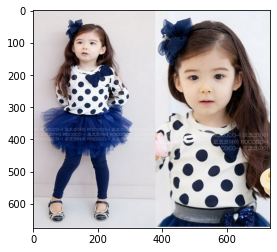

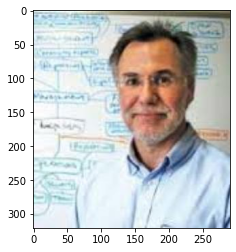

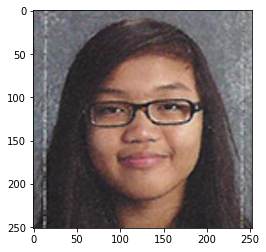

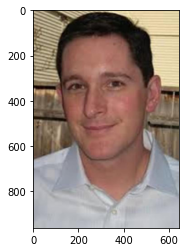

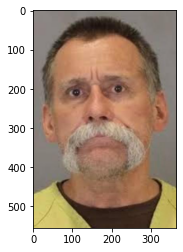

In [10]:
imgs = [mpimg.imread(total_imgs_dir+img) for img in random.sample(total_imgs,5)]

for n in range(5):
    plt.imshow(imgs[n])
    plt.show()

In [11]:
train_ages = [name.split('_')[0] for name in train_imgs]

train_labels = pd.DataFrame({'age' : train_ages})
train_labels['age'] = train_labels['age'].map(lambda x: int(float(x.replace('"', ''))))

train_labels.head()

,age
0,7
1,35
2,26
3,22
4,56


I am splitting the ages as 0-13, 14-16, 17-19, 20-23, 24-30, 31-40, 41-60, 60+. Since this project focuses on screening for minors, I focused on ages 14-23. To make sure these ages get correctly labeled, I shortened the ranges of the age on ages 14-23.

In [12]:
bins = [0, 13, 16, 20, 23, 30, 40, 60, np.inf]
names = ['0-13', '14-16', '17-20', '21-23', '24-30', '31-40', '41-60', '60+']

train_labels['AgeRange'] = pd.cut(train_labels['age'], bins, labels=names)

In [13]:
train_labels.head()

,age,AgeRange
0,7,0-13
1,35,31-40
2,26,24-30
3,22,21-23
4,56,41-60


In [14]:
# Get indexes of each age bins
age_0_13_index = list(train_labels[train_labels['AgeRange'] == '0-13'].index)
age_14_16_index = list(train_labels[train_labels['AgeRange'] == '14-16'].index)
age_17_20_index = list(train_labels[train_labels['AgeRange'] == '17-20'].index)
age_21_23_index = list(train_labels[train_labels['AgeRange'] == '21-23'].index)
age_24_30_index = list(train_labels[train_labels['AgeRange'] == '24-30'].index)
age_31_40_index = list(train_labels[train_labels['AgeRange'] == '31-40'].index)
age_41_60_index = list(train_labels[train_labels['AgeRange'] == '41-60'].index)
age_60_up_index = list(train_labels[train_labels['AgeRange'] == '60+'].index)

In [15]:
age_0_13_imgs = [train_imgs[index] for index in age_0_13_index]
age_14_16_imgs = [train_imgs[index] for index in age_14_16_index]
age_17_20_imgs = [train_imgs[index] for index in age_17_20_index]
age_21_23_imgs = [train_imgs[index] for index in age_21_23_index]
age_24_30_imgs = [train_imgs[index] for index in age_24_30_index]
age_31_40_imgs = [train_imgs[index] for index in age_31_40_index]
age_41_60_imgs = [train_imgs[index] for index in age_41_60_index]
age_60_up_imgs = [train_imgs[index] for index in age_60_up_index]

In [16]:
def copy_image_to_new_folder(images, list_name, folder_name):
    os.mkdir(os.path.join(folder_name, list_name))
    
    for img in images:
        origin = os.path.join(folder_name, img)
        destination = os.path.join(os.path.join(folder_name, list_name), img)
        shutil.copyfile(origin, destination)

In [17]:
copy_image_to_new_folder(age_0_13_imgs, 'age_0_13_imgs', train_dir)
copy_image_to_new_folder(age_14_16_imgs, 'age_14_16_imgs', train_dir)
copy_image_to_new_folder(age_17_20_imgs, 'age_17_20_imgs', train_dir)
copy_image_to_new_folder(age_21_23_imgs, 'age_21_23_imgs', train_dir)
copy_image_to_new_folder(age_24_30_imgs, 'age_24_30_imgs', train_dir)
copy_image_to_new_folder(age_31_40_imgs, 'age_31_40_imgs', train_dir)
copy_image_to_new_folder(age_41_60_imgs, 'age_41_60_imgs', train_dir)
copy_image_to_new_folder(age_60_up_imgs, 'age_60_up_imgs', train_dir)

In [18]:
validation_ages = [name.split('_')[0] for name in validation_imgs]

validation_labels = pd.DataFrame({'age' : validation_ages})
validation_labels['age'] = validation_labels['age'].map(lambda x: int(float(x.replace('"', ''))))

In [19]:
bins = [0, 13, 16, 20, 23, 30, 40, 60, np.inf]
names = ['0-13', '14-16', '17-20', '21-23', '24-30', '31-40', '41-60', '60+']

validation_labels['AgeRange'] = pd.cut(validation_labels['age'], bins, labels=names)

In [20]:
validation_labels.head()

,age,AgeRange
0,21,21-23
1,80,60+
2,24,24-30
3,27,24-30
4,39,31-40


In [21]:
age_0_13_index = list(validation_labels[validation_labels['AgeRange'] == '0-13'].index)
age_14_16_index = list(validation_labels[validation_labels['AgeRange'] == '14-16'].index)
age_17_20_index = list(validation_labels[validation_labels['AgeRange'] == '17-20'].index)
age_21_23_index = list(validation_labels[validation_labels['AgeRange'] == '21-23'].index)
age_24_30_index = list(validation_labels[validation_labels['AgeRange'] == '24-30'].index)
age_31_40_index = list(validation_labels[validation_labels['AgeRange'] == '31-40'].index)
age_41_60_index = list(validation_labels[validation_labels['AgeRange'] == '41-60'].index)
age_60_up_index = list(validation_labels[validation_labels['AgeRange'] == '60+'].index)

In [22]:
age_0_13_imgs = [validation_imgs[index] for index in age_0_13_index]
age_14_16_imgs = [validation_imgs[index] for index in age_14_16_index]
age_17_20_imgs = [validation_imgs[index] for index in age_17_20_index]
age_21_23_imgs = [validation_imgs[index] for index in age_21_23_index]
age_24_30_imgs = [validation_imgs[index] for index in age_24_30_index]
age_31_40_imgs = [validation_imgs[index] for index in age_31_40_index]
age_41_60_imgs = [validation_imgs[index] for index in age_41_60_index]
age_60_up_imgs = [validation_imgs[index] for index in age_60_up_index]

In [23]:
copy_image_to_new_folder(age_0_13_imgs, 'age_0_13_imgs', validation_dir)
copy_image_to_new_folder(age_14_16_imgs, 'age_14_16_imgs', validation_dir)
copy_image_to_new_folder(age_17_20_imgs, 'age_17_20_imgs', validation_dir)
copy_image_to_new_folder(age_21_23_imgs, 'age_21_23_imgs', validation_dir)
copy_image_to_new_folder(age_24_30_imgs, 'age_24_30_imgs', validation_dir)
copy_image_to_new_folder(age_31_40_imgs, 'age_31_40_imgs', validation_dir)
copy_image_to_new_folder(age_41_60_imgs, 'age_41_60_imgs', validation_dir)
copy_image_to_new_folder(age_60_up_imgs, 'age_60_up_imgs', validation_dir)

In [24]:
test_ages = [name.split('_')[0] for name in test_imgs]

test_labels = pd.DataFrame({'age' : test_ages})
test_labels['age'] = test_labels['age'].map(lambda x: int(float(x.replace('"', ''))))

In [25]:
bins = [0, 13, 16, 20, 23, 30, 40, 60, np.inf]
names = ['0-13', '14-16', '17-20', '21-23', '24-30', '31-40', '41-60', '60+']

test_labels['AgeRange'] = pd.cut(test_labels['age'], bins, labels=names)

In [26]:
test_labels.head()

,age,AgeRange
0,10,0-13
1,10,0-13
2,10,0-13
3,10,0-13
4,10,0-13


In [27]:
age_0_13_index = list(test_labels[test_labels['AgeRange'] == '0-13'].index)
age_14_16_index = list(test_labels[test_labels['AgeRange'] == '14-16'].index)
age_17_20_index = list(test_labels[test_labels['AgeRange'] == '17-20'].index)
age_21_23_index = list(test_labels[test_labels['AgeRange'] == '21-23'].index)
age_24_30_index = list(test_labels[test_labels['AgeRange'] == '24-30'].index)
age_31_40_index = list(test_labels[test_labels['AgeRange'] == '31-40'].index)
age_41_60_index = list(test_labels[test_labels['AgeRange'] == '40-60'].index)
age_60_up_index = list(test_labels[test_labels['AgeRange'] == '60+'].index)

In [28]:
age_0_13_imgs = [test_imgs[index] for index in age_0_13_index]
age_14_16_imgs = [test_imgs[index] for index in age_14_16_index]
age_17_20_imgs = [test_imgs[index] for index in age_17_20_index]
age_21_23_imgs = [test_imgs[index] for index in age_21_23_index]
age_24_30_imgs = [test_imgs[index] for index in age_24_30_index]
age_31_40_imgs = [test_imgs[index] for index in age_31_40_index]
age_41_60_imgs = [test_imgs[index] for index in age_41_60_index]
age_60_up_imgs = [test_imgs[index] for index in age_60_up_index]

In [29]:
copy_image_to_new_folder(age_0_13_imgs, 'age_0_13_imgs', test_dir)
copy_image_to_new_folder(age_14_16_imgs, 'age_14_16_imgs', test_dir)
copy_image_to_new_folder(age_17_20_imgs, 'age_17_20_imgs', test_dir)
copy_image_to_new_folder(age_21_23_imgs, 'age_21_23_imgs', test_dir)
copy_image_to_new_folder(age_24_30_imgs, 'age_24_30_imgs', test_dir)
copy_image_to_new_folder(age_31_40_imgs, 'age_31_40_imgs', test_dir)
copy_image_to_new_folder(age_41_60_imgs, 'age_41_60_imgs', test_dir)
copy_image_to_new_folder(age_60_up_imgs, 'age_60_up_imgs', test_dir)

In [36]:
train_data_gen = ImageDataGenerator(rescale=1./255)
train_generator = train_data_gen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=128)

validation_data_gen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_data_gen.flow_from_directory(validation_dir, target_size=(64, 64), batch_size=128)

test_data_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_data_gen.flow_from_directory(test_dir, target_size=(64, 64), batch_size=128)

Found 14000 images belonging to 8 classes.
Found 7000 images belonging to 8 classes.
Found 2556 images belonging to 8 classes.


In [37]:
train_generator.class_indices

{'age_0_13_imgs': 0,
 'age_14_16_imgs': 1,
 'age_17_20_imgs': 2,
 'age_21_23_imgs': 3,
 'age_24_30_imgs': 4,
 'age_31_40_imgs': 5,
 'age_41_60_imgs': 6,
 'age_60_up_imgs': 7}

In [38]:
train_imgs, train_labels = next(train_generator)
validation_imgs, validation_labels = next(validation_generator)
test_imgs, test_labels = next(test_generator)

In [39]:
print(train_imgs.shape, validation_imgs.shape, test_imgs.shape)

(128, 64, 64, 3) (128, 64, 64, 3) (128, 64, 64, 3)


In [41]:
print(train_labels.shape, validation_labels.shape, test_labels.shape)

(128, 8) (128, 8) (128, 8)


In [40]:
train_images = train_imgs.reshape(train_imgs.shape[0], -1)
validation_images = validation_imgs.reshape(validation_imgs.shape[0], -1)
test_images = test_imgs.reshape(test_imgs.shape[0], -1)

print(train_images.shape, validation_images.shape, test_images.shape)

(128, 12288) (128, 12288) (128, 12288)


In [44]:
model = models.Sequential()
model.add(layers.Dense(30, activation='relu', input_shape=(12288,)))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

result = model.fit(train_images, train_labels,
                    epochs=20,
                    batch_size=64,
                    validation_data=(validation_images, validation_labels))

Epoch 1/20
2/2 [==============================] - 0s 117ms/step - loss: 2.9781 - accuracy: 0.1406 - val_loss: 2.9286 - val_accuracy: 0.2656
Epoch 2/20
2/2 [==============================] - 0s 26ms/step - loss: 2.6595 - accuracy: 0.2266 - val_loss: 2.7896 - val_accuracy: 0.2578
Epoch 3/20
2/2 [==============================] - 0s 27ms/step - loss: 2.6082 - accuracy: 0.1953 - val_loss: 2.6273 - val_accuracy: 0.1406
Epoch 4/20
2/2 [==============================] - 0s 27ms/step - loss: 2.4596 - accuracy: 0.1953 - val_loss: 2.4526 - val_accuracy: 0.2500
Epoch 5/20
2/2 [==============================] - 0s 30ms/step - loss: 2.3015 - accuracy: 0.2109 - val_loss: 2.4728 - val_accuracy: 0.1641
Epoch 6/20
2/2 [==============================] - 0s 29ms/step - loss: 2.2798 - accuracy: 0.2422 - val_loss: 2.3261 - val_accuracy: 0.2734
Epoch 7/20
2/2 [==============================] - 0s 29ms/step - loss: 2.1152 - accuracy: 0.2812 - val_loss: 2.2913 - val_accuracy: 0.1250
Epoch 8/20
2/2 [==========

In [46]:
def plot_loss_accuracy(result):
    history = result.history

    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

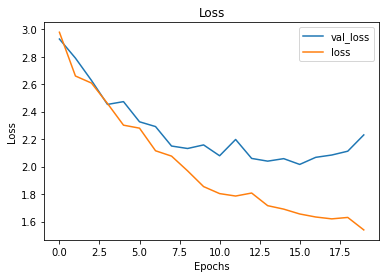

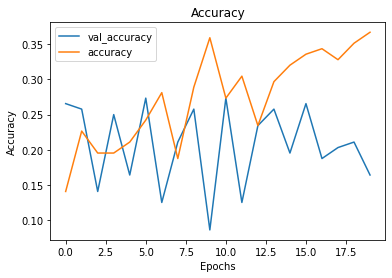

In [47]:
plot_loss_accuracy(result)

In [48]:
result_train = model.evaluate(train_images, train_labels)
result_train

4/4 [==============================] - 0s 2ms/step - loss: 1.5490 - accuracy: 0.3438


[1.5490193367004395, 0.34375]

In [49]:
result_test = model.evaluate(test_images, test_labels)
result_test

4/4 [==============================] - 0s 2ms/step - loss: 2.3878 - accuracy: 0.1875


[2.387821674346924, 0.1875]

## CNN

In [50]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

result = model.fit(train_generator,
                    epochs=25,
                    batch_size=64,
                    validation_data=validation_generator)

Epoch 1/25
110/110 [==============================] - 91s 824ms/step - loss: 1.7879 - accuracy: 0.3156 - val_loss: 1.7023 - val_accuracy: 0.3529
Epoch 2/25
110/110 [==============================] - 85s 772ms/step - loss: 1.6577 - accuracy: 0.3741 - val_loss: 1.6244 - val_accuracy: 0.3907
Epoch 3/25
110/110 [==============================] - 95s 869ms/step - loss: 1.6046 - accuracy: 0.3896 - val_loss: 1.6133 - val_accuracy: 0.3940
Epoch 4/25
110/110 [==============================] - 91s 828ms/step - loss: 1.5633 - accuracy: 0.4064 - val_loss: 1.6099 - val_accuracy: 0.3909
Epoch 5/25
110/110 [==============================] - 86s 784ms/step - loss: 1.5088 - accuracy: 0.4330 - val_loss: 1.5781 - val_accuracy: 0.4016
Epoch 6/25
110/110 [==============================] - 91s 825ms/step - loss: 1.4521 - accuracy: 0.4509 - val_loss: 1.5340 - val_accuracy: 0.4184
Epoch 7/25
110/110 [==============================] - 91s 825ms/step - loss: 1.4002 - accuracy: 0.4716 - val_loss: 1.5229 - val_ac

In [51]:
result_train = model.evaluate(train_generator)
result_train

110/110 [==============================] - 43s 390ms/step - loss: 0.1056 - accuracy: 0.9745


[0.10561970621347427, 0.9745000004768372]

In [52]:
result_test = model.evaluate(test_generator)
result_test

20/20 [==============================] - 22s 1s/step - loss: 4.3672 - accuracy: 0.3811


[4.367157936096191, 0.38106417655944824]

In [55]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

result = model.fit(train_generator,
                   epochs=15,
                   batch_size=64,
                   validation_data=validation_generator)

Epoch 1/15
110/110 [==============================] - 92s 832ms/step - loss: 1.8727 - accuracy: 0.2559 - val_loss: 1.8138 - val_accuracy: 0.3123
Epoch 2/15
110/110 [==============================] - 80s 733ms/step - loss: 1.7724 - accuracy: 0.3236 - val_loss: 1.7238 - val_accuracy: 0.3454
Epoch 3/15
110/110 [==============================] - 84s 762ms/step - loss: 1.7056 - accuracy: 0.3495 - val_loss: 1.6864 - val_accuracy: 0.3577
Epoch 4/15
110/110 [==============================] - 89s 813ms/step - loss: 1.6528 - accuracy: 0.3768 - val_loss: 1.6743 - val_accuracy: 0.3649
Epoch 5/15
110/110 [==============================] - 86s 780ms/step - loss: 1.6168 - accuracy: 0.3869 - val_loss: 1.6349 - val_accuracy: 0.3886
Epoch 6/15
110/110 [==============================] - 87s 789ms/step - loss: 1.5841 - accuracy: 0.4006 - val_loss: 1.6197 - val_accuracy: 0.3847
Epoch 7/15
110/110 [==============================] - 86s 776ms/step - loss: 1.5582 - accuracy: 0.4134 - val_loss: 1.6316 - val_ac

In [56]:
result_train = model.evaluate(train_generator)
result_train

110/110 [==============================] - 43s 391ms/step - loss: 1.2549 - accuracy: 0.5261


[1.2548768520355225, 0.5261428356170654]

In [57]:
result_test = model.evaluate(test_generator)
result_test

20/20 [==============================] - 10s 489ms/step - loss: 1.4910 - accuracy: 0.4562


[1.490965485572815, 0.45618152618408203]

In [59]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

result = model.fit(train_generator,
                    epochs=25,
                    batch_size=64,
                    validation_data=validation_generator)

Epoch 1/25
110/110 [==============================] - 96s 869ms/step - loss: 1.7595 - accuracy: 0.3312 - val_loss: 1.9352 - val_accuracy: 0.3216
Epoch 2/25
110/110 [==============================] - 88s 801ms/step - loss: 1.6230 - accuracy: 0.3896 - val_loss: 1.8792 - val_accuracy: 0.3249
Epoch 3/25
110/110 [==============================] - 79s 720ms/step - loss: 1.5503 - accuracy: 0.4209 - val_loss: 1.7554 - val_accuracy: 0.3241
Epoch 4/25
110/110 [==============================] - 79s 722ms/step - loss: 1.4861 - accuracy: 0.4400 - val_loss: 1.5526 - val_accuracy: 0.4253
Epoch 5/25
110/110 [==============================] - 82s 751ms/step - loss: 1.4234 - accuracy: 0.4659 - val_loss: 1.5271 - val_accuracy: 0.4316
Epoch 6/25
110/110 [==============================] - 82s 743ms/step - loss: 1.3741 - accuracy: 0.4810 - val_loss: 1.8932 - val_accuracy: 0.3293
Epoch 7/25
110/110 [==============================] - 90s 822ms/step - loss: 1.3342 - accuracy: 0.4991 - val_loss: 1.4988 - val_ac

In [60]:
result_train = model.evaluate(train_generator)
result_train

110/110 [==============================] - 52s 469ms/step - loss: 0.9314 - accuracy: 0.7019


[0.9313804507255554, 0.7018571496009827]

In [61]:
result_test = model.evaluate(test_generator)
result_test

20/20 [==============================] - 10s 504ms/step - loss: 3.3462 - accuracy: 0.4221


[3.346161127090454, 0.42214396595954895]

In [62]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), kernel_regularizer=l2(0.005), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.005), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.005), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(32, kernel_regularizer=l2(0.005), activation='relu'))

model.add(layers.Dense(16, kernel_regularizer=l2(0.005), activation='relu'))

model.add(layers.Dense(8, kernel_regularizer=l2(0.005), activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

result = model.fit(train_generator,
                    epochs=15,
                    batch_size=64,
                    validation_data=validation_generator)

Epoch 1/15
110/110 [==============================] - 95s 852ms/step - loss: 2.6221 - accuracy: 0.3279 - val_loss: 2.5483 - val_accuracy: 0.3500
Epoch 2/15
110/110 [==============================] - 97s 886ms/step - loss: 2.1316 - accuracy: 0.3721 - val_loss: 2.2836 - val_accuracy: 0.2987
Epoch 3/15
110/110 [==============================] - 98s 893ms/step - loss: 1.9160 - accuracy: 0.3975 - val_loss: 2.0739 - val_accuracy: 0.3143
Epoch 4/15
110/110 [==============================] - 99s 901ms/step - loss: 1.7854 - accuracy: 0.4204 - val_loss: 1.8794 - val_accuracy: 0.3877
Epoch 5/15
110/110 [==============================] - 95s 867ms/step - loss: 1.7163 - accuracy: 0.4342 - val_loss: 1.8144 - val_accuracy: 0.3771
Epoch 6/15
110/110 [==============================] - 93s 850ms/step - loss: 1.6570 - accuracy: 0.4461 - val_loss: 1.7230 - val_accuracy: 0.4123
Epoch 7/15
110/110 [==============================] - 92s 835ms/step - loss: 1.6279 - accuracy: 0.4543 - val_loss: 2.1479 - val_ac

In [63]:
result_train = model.evaluate(train_generator)
result_train

110/110 [==============================] - 51s 459ms/step - loss: 1.6078 - accuracy: 0.4660


[1.6077905893325806, 0.4659999907016754]

In [64]:
result_test = model.evaluate(test_generator)
result_test

20/20 [==============================] - 10s 511ms/step - loss: 1.7500 - accuracy: 0.4437


[1.7500120401382446, 0.44366195797920227]

In [73]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Optimizer.Adam(lr=0.0001),
              metrics=['accuracy'])

result = model.fit(train_generator,
                    epochs=15,
                    batch_size=64,
                    validation_data=validation_generator)

C:\Users\soohy\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/15
110/110 [==============================] - 285s 3s/step - loss: 1.8143 - accuracy: 0.3306 - val_loss: 1.9966 - val_accuracy: 0.2749
Epoch 2/15
110/110 [==============================] - 286s 3s/step - loss: 1.6771 - accuracy: 0.3724 - val_loss: 1.9358 - val_accuracy: 0.3609
Epoch 3/15
110/110 [==============================] - 283s 3s/step - loss: 1.6181 - accuracy: 0.3918 - val_loss: 1.8494 - val_accuracy: 0.3706
Epoch 4/15
110/110 [==============================] - 276s 3s/step - loss: 1.5702 - accuracy: 0.4140 - val_loss: 1.7527 - val_accuracy: 0.3623
Epoch 5/15
110/110 [==============================] - 251s 2s/step - loss: 1.5340 - accuracy: 0.4245 - val_loss: 1.6545 - val_accuracy: 0.3863
Epoch 6/15
110/110 [==============================] - 267s 2s/step - loss: 1.4974 - accuracy: 0.4370 - val_loss: 1.6146 - val_accuracy: 0.3920
Epoch 7/15
110/110 [==============================] - 281s 3s/step - loss: 1.4509 - accuracy: 0.4570 - val_loss: 1.5988 - val_accuracy: 0.3990

In [74]:
result_train = model.evaluate(train_generator)
result_train

110/110 [==============================] - 59s 537ms/step - loss: 1.1274 - accuracy: 0.5896


[1.1274033784866333, 0.5895714163780212]

In [75]:
result_test = model.evaluate(test_generator)
result_test

20/20 [==============================] - 13s 641ms/step - loss: 1.7182 - accuracy: 0.4081


[1.718240737915039, 0.4080594778060913]

In [65]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="RMSprop",
              metrics=['accuracy'])

result = model.fit(train_generator,
                    epochs=15,
                    batch_size=64,
                    validation_data=validation_generator)

Epoch 1/15
110/110 [==============================] - 99s 897ms/step - loss: 1.7846 - accuracy: 0.3094 - val_loss: 1.9389 - val_accuracy: 0.2419
Epoch 2/15
110/110 [==============================] - 103s 941ms/step - loss: 1.6573 - accuracy: 0.3744 - val_loss: 1.8578 - val_accuracy: 0.3180
Epoch 3/15
110/110 [==============================] - 103s 934ms/step - loss: 1.5876 - accuracy: 0.4021 - val_loss: 1.7564 - val_accuracy: 0.3531
Epoch 4/15
110/110 [==============================] - 99s 905ms/step - loss: 1.5309 - accuracy: 0.4241 - val_loss: 1.6985 - val_accuracy: 0.3267
Epoch 5/15
110/110 [==============================] - 100s 910ms/step - loss: 1.4792 - accuracy: 0.4394 - val_loss: 1.6010 - val_accuracy: 0.3909
Epoch 6/15
110/110 [==============================] - 104s 947ms/step - loss: 1.4300 - accuracy: 0.4617 - val_loss: 1.6572 - val_accuracy: 0.3796
Epoch 7/15
110/110 [==============================] - 98s 891ms/step - loss: 1.3875 - accuracy: 0.4773 - val_loss: 1.4654 - va

In [66]:
result_train = model.evaluate(train_generator)
result_train

110/110 [==============================] - 49s 446ms/step - loss: 1.0234 - accuracy: 0.6151


[1.0233789682388306, 0.6151428818702698]

In [67]:
result_test = model.evaluate(test_generator)
result_test

20/20 [==============================] - 10s 515ms/step - loss: 1.8717 - accuracy: 0.3865


[1.8716790676116943, 0.386541485786438]

In [71]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="RMSprop",
              metrics=['accuracy'])

result = model.fit(train_generator,
                    epochs=15,
                    batch_size=64,
                    validation_data=validation_generator)

Epoch 1/15
110/110 [==============================] - 121s 1s/step - loss: 1.8591 - accuracy: 0.2711 - val_loss: 1.8175 - val_accuracy: 0.3246
Epoch 2/15
110/110 [==============================] - 110s 998ms/step - loss: 1.7533 - accuracy: 0.3302 - val_loss: 1.7784 - val_accuracy: 0.3094
Epoch 3/15
110/110 [==============================] - 108s 988ms/step - loss: 1.6964 - accuracy: 0.3548 - val_loss: 1.6723 - val_accuracy: 0.3767
Epoch 4/15
110/110 [==============================] - 113s 1s/step - loss: 1.6531 - accuracy: 0.3747 - val_loss: 1.7970 - val_accuracy: 0.3286
Epoch 5/15
110/110 [==============================] - 108s 987ms/step - loss: 1.6228 - accuracy: 0.3821 - val_loss: 1.6188 - val_accuracy: 0.3937
Epoch 6/15
110/110 [==============================] - 108s 980ms/step - loss: 1.5932 - accuracy: 0.3935 - val_loss: 1.6056 - val_accuracy: 0.3969
Epoch 7/15
110/110 [==============================] - 107s 972ms/step - loss: 1.5555 - accuracy: 0.4076 - val_loss: 1.6931 - val_a

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="RMSprop",
              metrics=['accuracy'])

result = model.fit(train_generator,
                   epochs=12,
                   batch_size=64,
                   validation_data=validation_generator)


Epoch 1/12
110/110 [==============================] - 96s 870ms/step - loss: 1.8653 - accuracy: 0.2774 - val_loss: 1.7736 - val_accuracy: 0.3324
Epoch 2/12
110/110 [==============================] - 87s 793ms/step - loss: 1.7451 - accuracy: 0.3325 - val_loss: 1.6980 - val_accuracy: 0.3611
Epoch 3/12
110/110 [==============================] - 93s 844ms/step - loss: 1.6975 - accuracy: 0.3548 - val_loss: 1.6991 - val_accuracy: 0.3563
Epoch 4/12
110/110 [==============================] - 82s 746ms/step - loss: 1.6608 - accuracy: 0.3702 - val_loss: 1.6770 - val_accuracy: 0.3614
Epoch 5/12
110/110 [==============================] - 91s 830ms/step - loss: 1.6309 - accuracy: 0.3851 - val_loss: 1.6266 - val_accuracy: 0.3803
Epoch 6/12
110/110 [==============================] - 98s 891ms/step - loss: 1.6004 - accuracy: 0.3944 - val_loss: 1.6044 - val_accuracy: 0.3977
Epoch 7/12
110/110 [==============================] - 93s 845ms/step - loss: 1.5681 - accuracy: 0.4056 - val_loss: 1.5774 - val_ac

In [ ]:
result_train = model.evaluate(train_generator)
result_train

110/110 [==============================] - 57s 521ms/step - loss: 1.3612 - accuracy: 0.4885


[1.3611869812011719, 0.4884999990463257]

In [ ]:
result_test = model.evaluate(test_generator)
result_test

20/20 [==============================] - 12s 623ms/step - loss: 1.5526 - accuracy: 0.4353


[1.552586555480957, 0.43533626198768616]

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

result = model.fit(train_generator,
                   epochs=12,
                   batch_size=64,
                   validation_data=validation_generator)

Epoch 1/12
110/110 [==============================] - 102s 920ms/step - loss: 1.8619 - accuracy: 0.2664 - val_loss: 1.8218 - val_accuracy: 0.2999
Epoch 2/12
110/110 [==============================] - 94s 856ms/step - loss: 1.7883 - accuracy: 0.3140 - val_loss: 1.7633 - val_accuracy: 0.3310
Epoch 3/12
110/110 [==============================] - 91s 826ms/step - loss: 1.7292 - accuracy: 0.3434 - val_loss: 1.7176 - val_accuracy: 0.3626
Epoch 4/12
110/110 [==============================] - 93s 845ms/step - loss: 1.6686 - accuracy: 0.3707 - val_loss: 1.6663 - val_accuracy: 0.3669
Epoch 5/12
110/110 [==============================] - 86s 784ms/step - loss: 1.6413 - accuracy: 0.3764 - val_loss: 1.6378 - val_accuracy: 0.3821
Epoch 6/12
110/110 [==============================] - 93s 844ms/step - loss: 1.6093 - accuracy: 0.3874 - val_loss: 1.6131 - val_accuracy: 0.3917
Epoch 7/12
110/110 [==============================] - 82s 746ms/step - loss: 1.5799 - accuracy: 0.4006 - val_loss: 1.5966 - val_a

In [ ]:
result_train = model.evaluate(train_generator)
result_train

110/110 [==============================] - 49s 450ms/step - loss: 1.4266 - accuracy: 0.4704


[1.4265786409378052, 0.47042858600616455]

In [ ]:
result_test = model.evaluate(test_generator)
result_test

20/20 [==============================] - 11s 532ms/step - loss: 1.4821 - accuracy: 0.4608


[1.4820901155471802, 0.4608038067817688]

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="Adagrad",
              metrics=['accuracy'])

result = model.fit(train_generator,
                   epochs=12,
                   batch_size=64,
                   validation_data=validation_generator)

Epoch 1/12
110/110 [==============================] - 79s 717ms/step - loss: 2.0732 - accuracy: 0.1620 - val_loss: 2.0669 - val_accuracy: 0.1713
Epoch 2/12
110/110 [==============================] - 76s 696ms/step - loss: 2.0612 - accuracy: 0.1757 - val_loss: 2.0596 - val_accuracy: 0.1729
Epoch 3/12
110/110 [==============================] - 77s 696ms/step - loss: 2.0536 - accuracy: 0.1774 - val_loss: 2.0531 - val_accuracy: 0.1739
Epoch 4/12
110/110 [==============================] - 79s 717ms/step - loss: 2.0463 - accuracy: 0.1784 - val_loss: 2.0468 - val_accuracy: 0.1753
Epoch 5/12
110/110 [==============================] - 76s 692ms/step - loss: 2.0393 - accuracy: 0.1787 - val_loss: 2.0408 - val_accuracy: 0.1757
Epoch 6/12
110/110 [==============================] - 75s 682ms/step - loss: 2.0324 - accuracy: 0.1790 - val_loss: 2.0350 - val_accuracy: 0.1760
Epoch 7/12
110/110 [==============================] - 78s 708ms/step - loss: 2.0262 - accuracy: 0.1788 - val_loss: 2.0300 - val_ac

In [ ]:
result_train = model.evaluate(train_generator)
result_train

110/110 [==============================] - 40s 361ms/step - loss: 1.9992 - accuracy: 0.1789


[1.9991832971572876, 0.17885714769363403]

In [ ]:
result_test = model.evaluate(test_generator)
result_test

20/20 [==============================] - 9s 427ms/step - loss: 2.0835 - accuracy: 0.0000e+00


[2.083477258682251, 0.0]

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

result = model.fit(train_generator,
                   epochs=12,
                   batch_size=64,
                   validation_data=validation_generator)

Epoch 1/12
 22/110 [=====>........................] - ETA: 1:05 - loss: 2.0350 - accuracy: 0.1467

KeyboardInterrupt: 

In [ ]:
result_train = model.evaluate(train_generator)
result_train

In [ ]:
result_test = model.evaluate(test_generator)
result_test